In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

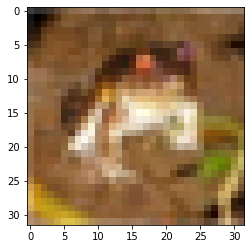

In [32]:
plt.imshow(x_train[0])

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [7]:
y_train[0]

array([6], dtype=uint8)

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_train_cat=to_categorical(y_train,10)

In [10]:
y_train_cat[0].shape

(10,)

In [11]:
y_test_cat=to_categorical(y_test,10)

In [12]:
x_train.max()

255

In [13]:
x_train_normalize=x_train/255.0

In [14]:
x_test_normalize=x_test/255.0

In [15]:
from keras.models import Sequential

In [16]:
model=Sequential([
                keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(32,32,3)),
                keras.layers.MaxPool2D(pool_size=(2,2)),
                keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
                keras.layers.MaxPool2D(pool_size=(2,2)),
                keras.layers.Flatten(),
                keras.layers.Dense(64,activation='relu'),
                keras.layers.Dense(128,activation='relu'),
                keras.layers.Dense(256,activation='relu'),
                keras.layers.Dense(10,activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train_normalize,y_train_cat,epochs=10)


Epoch 1/10
50000/50000 [==============================] - 33s 652us/step - loss: 1.6013 - accuracy: 0.4092
Epoch 2/10
50000/50000 [==============================] - 33s 651us/step - loss: 1.3170 - accuracy: 0.5253
Epoch 3/10
50000/50000 [==============================] - 29s 583us/step - loss: 1.1965 - accuracy: 0.5742
Epoch 4/10
50000/50000 [==============================] - 29s 589us/step - loss: 1.0999 - accuracy: 0.6104
Epoch 5/10
50000/50000 [==============================] - 30s 596us/step - loss: 1.0231 - accuracy: 0.6392
Epoch 6/10
50000/50000 [==============================] - 33s 652us/step - loss: 0.9714 - accuracy: 0.6575
Epoch 7/10
50000/50000 [==============================] - 32s 647us/step - loss: 0.9182 - accuracy: 0.6771
Epoch 8/10
50000/50000 [==============================] - 34s 682us/step - loss: 0.8785 - accuracy: 0.6911
Epoch 9/10
50000/50000 [==============================] - 31s 610us/step - loss: 0.8417 - accuracy: 0.7041
Epoch 10/10
50000/50000 [===========

In [19]:
model.evaluate(x_test_normalize,y_test_cat)

10000/10000 [==============================] - 2s 200us/step


[1.096651865005493, 0.6317999958992004]

In [21]:
y_pred=model.predict_classes(x_test_normalize)

In [22]:
y_pred[0]

3

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.66      1000
           1       0.81      0.74      0.77      1000
           2       0.47      0.60      0.53      1000
           3       0.38      0.53      0.44      1000
           4       0.61      0.54      0.57      1000
           5       0.47      0.59      0.53      1000
           6       0.77      0.68      0.72      1000
           7       0.73      0.68      0.70      1000
           8       0.81      0.71      0.75      1000
           9       0.79      0.69      0.74      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.64     10000
weighted avg       0.66      0.63      0.64     10000



In [24]:
print(confusion_matrix(y_test,y_pred))

[[574  24 152  53  27  18  10  16  86  40]
 [ 12 740  38  40   9  12  20  11  27  91]
 [ 41   4 597  98  76 107  40  26   5   6]
 [ 11   4  86 529  45 241  46  32   3   3]
 [ 13   4 113 152 536  69  33  71   9   0]
 [  5   0  85 198  43 592  21  52   0   4]
 [  3   4  75 128  30  73 676   8   0   3]
 [  7   1  47  74  82  98   8 676   1   6]
 [ 59  45  48  50  19  22  13   6 706  32]
 [ 26  93  23  66   8  21  14  22  35 692]]


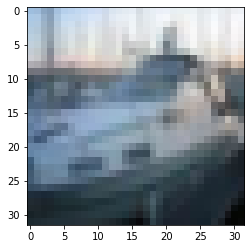

In [28]:
plt.imshow(x_test[2])

In [31]:
img=x_test_normalize[2].reshape(1,32,32,3)
model.predict_classes(img)

array([0], dtype=int64)

In [33]:
model.save('./cifar.h5')